**Machine Learning Basic Principles 2018 - Data Analysis Project Report**

*All the text in italics is instructions for filling the template - remove when writing the project report!*

# *Title* 

*Title should be concise and informative, describes the approach to solve the problem. Some good titles from previous years:*

*- Comparing extreme learning machines and naive bayes’ classifier in spam detection*

*- Using linear discriminant analysis in spam detection*

*Some not-so-good titles:*

*- Bayesian spam filtering with extras*

*- Two-component classifier for spam detection*

*- CS-E3210 Term Project, final report*




## Abstract

*Precise summary of the whole report, previews the contents and results. Must be a single paragraph between 100 and 200 words.*



## 1. Introduction

*Background, problem statement, motivation, many references, description of
contents. Introduces the reader to the topic and the broad context within which your
research/project fits*

*- What do you hope to learn from the project?*
*- What question is being addressed?*
*- Why is this task important? (motivation)*

*Keep it short (half to 1 page).*



## 2. Data analysis

*Briefly describe data (class distribution, dimensionality) and how will it affect
classification. Visualize the data. Don’t focus too much on the meaning of the features,
unless you want to.*

*- Include histograms showing class distribution.*



In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
# Load the data and cleanup
#Loading the Feature matrix and Label vector
df_1=pd.read_csv('train_data.csv')
df_2=pd.read_csv('train_labels.csv')
# convert the data frame to numpy matrix    
X = df_1.as_matrix() 
N,d = df_1.shape #N=example d=features
Y=df_2.as_matrix() 



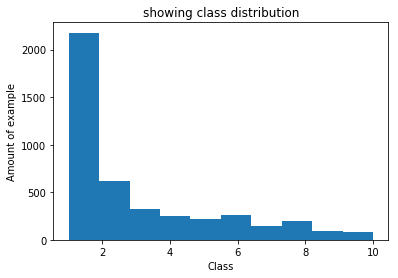

2177.0


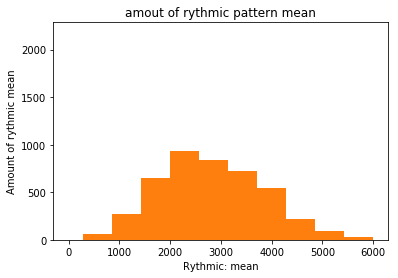

In [9]:
#Analysis of the input data
#histogram showing class distribution
plt.hist(Y,bins=10,range=[1,10],align='mid')
plt.xlabel('Class')
plt.ylabel('Amount of example')
plt.title('showing class distribution')
plt.show()
bounts, bins, bars = plt.hist(Y)
print(bounts[0])

#histogram showing amout of rythmic pattern mean
X_1=np.empty((N,1))
for i in range(N):
    X_1[i]=np.mean(X[i,:24])
plt.hist(X_1)
plt.xlabel('Rythmic: mean')
plt.ylabel('Amount of rythmic mean')
plt.title('amout of rythmic pattern mean')
plt.show()

In [5]:
##loosing the first example!
X_classes=[]
for i in range((10)):
    X_classes_for=np.empty((int(bounts[i]),d))
    lauf=0
    for k in range((N)):
        if Y[k]==(i+1):
            X_classes_for[lauf,:]=(X[k,:])
            lauf+=1
    X_classes.append(X_classes_for)
print((X_classes[0]))

[[  2.30940000e+03   4.78040000e+03   4.05570000e+03 ...,   5.25230000e-02
    5.23570000e-02   5.52970000e-02]
 [  2.33190000e+03   4.60700000e+03   4.73230000e+03 ...,   6.11380000e-02
    8.55090000e-02   4.94220000e-02]
 [  3.35090000e+03   6.27440000e+03   5.03700000e+03 ...,   8.08850000e-02
    1.48910000e-01   4.20270000e-02]
 ..., 
 [  1.29360000e+03   2.36180000e+03   3.42540000e+03 ...,   4.18680000e-02
    1.01890000e-01   9.28110000e-02]
 [  2.23830000e+03   3.66810000e+03   4.44530000e+03 ...,   7.57220000e-02
    7.69900000e-02   5.98900000e-02]
 [  2.58140000e+03   4.73040000e+03   5.02210000e+03 ...,   5.82890000e-02
    5.21430000e-02   4.15240000e-02]]


In [6]:
##creating a list: each row of the list constist of a specific class. One row of the list has a shape of 1,15
X_classes_first=[]#10 arrays in the end 
for i in range((10)):
    X_for=X_classes[i]
    X_for_for=[]
    for j in range(7):
        hilf=np.mean(X_for[:,24*j:24*(j+1)])
        X_for_for.append(hilf)
    for j in range(4):
        hilf=np.mean(X_for[:,168+12*j:168+12*(j+1)])
        X_for_for.append(hilf)
    for j in range(4):
        hilf=np.mean(X_for[:,216+12*j:216+12*(j+1)])
        X_for_for.append(hilf)
    X_classes_first.append(X_for_for)
a=X_classes_first[1]
print(X_classes_first[1])       

[2400.0683814050703, 1758.6356277642935, 1208.8334930555557, 6093.0982605177996, 2187.9372350323624, 525.57142003775618, 6964.6902642259965, 0.38068964023732471, 0.076579721601941764, 0.012826995685005393, 0.99482915318230858, 333333.33317384252, 1.1507292563781015, -0.099717728290183383, 0.11820057173678532]


In [7]:
## Normalizing values:
avg_features = [np.mean([genre[feature_num] for genre in X_classes_first]) for feature_num in range(len(X_classes_first[0]))]
X_classes_first_normalized = [np.divide(X_classes_first[genre_num],avg_features) for genre_num in  range(len(X_classes_first))]

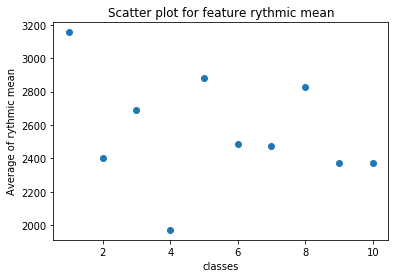

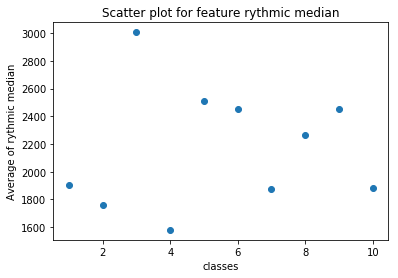

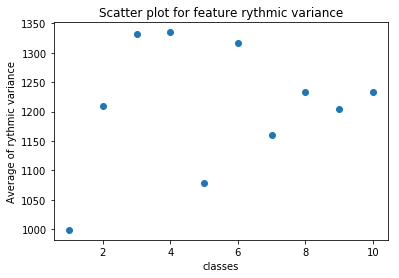

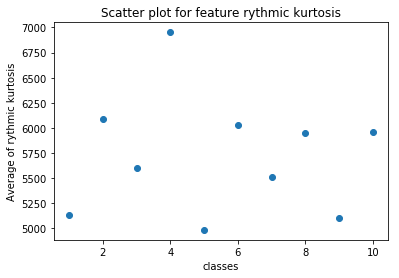

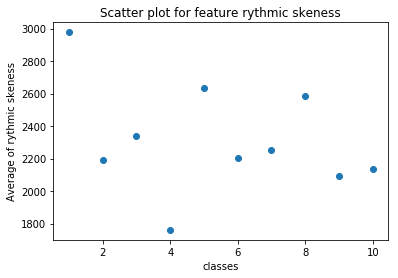

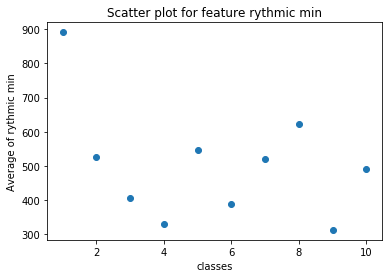

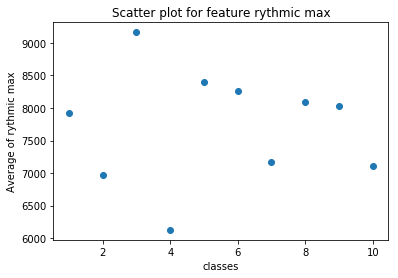

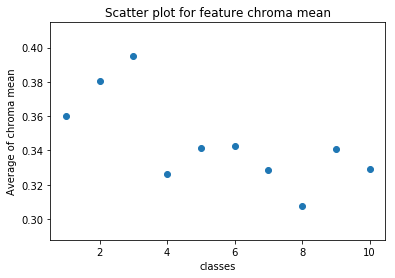

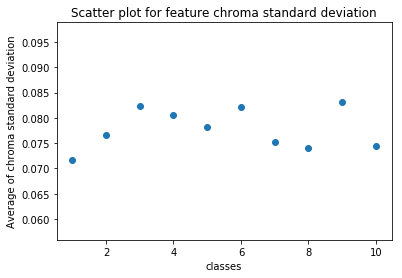

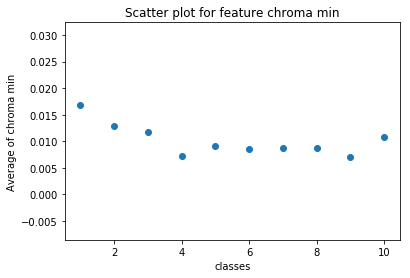

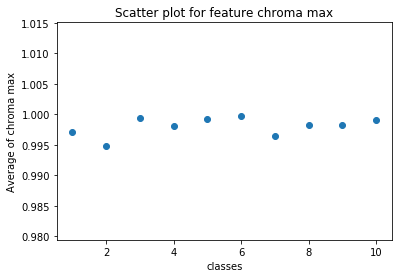

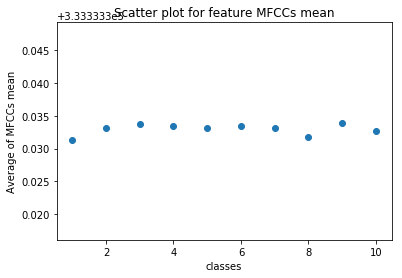

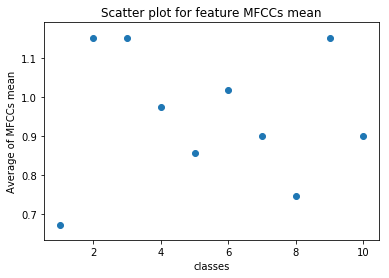

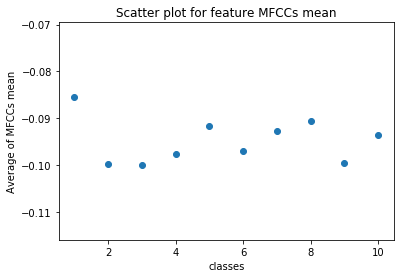

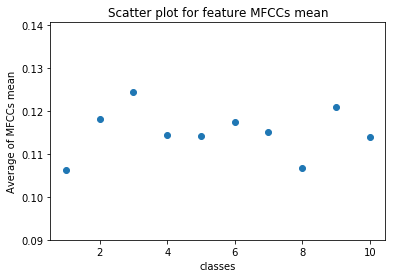

In [10]:
main_comp=['rythmic','chroma','MFCCs']
statistics=['mean', 'median','variance','kurtosis','skeness','min', 'max','mean','standard deviation','min', 'max']
lauf=0
for k in range((15)):
    classes=[1,2,3,4,5,6,7,8,9,10]
    y=np.empty((1,10))
    for i in range(10):
        X_for=X_classes_first[i]
        y[0,i]=X_for[k]
    plt.scatter(classes,y)
    if k<7:
        plt.title('Scatter plot for feature '+main_comp[0]+' '+statistics[lauf])
        plt.ylabel('Average of '+main_comp[0]+' '+statistics[lauf])
        lauf+=1
    elif 11>k>6:
        plt.title('Scatter plot for feature '+main_comp[1]+' '+statistics[lauf])
        plt.ylabel('Average of '+main_comp[1]+' '+statistics[lauf])
        lauf+=1
    else:
        lauf=7
        plt.title('Scatter plot for feature '+main_comp[2]+' '+statistics[lauf])
        plt.ylabel('Average of '+main_comp[2]+' '+statistics[lauf])
        lauf+=1
    plt.xlabel('classes')
    plt.show()

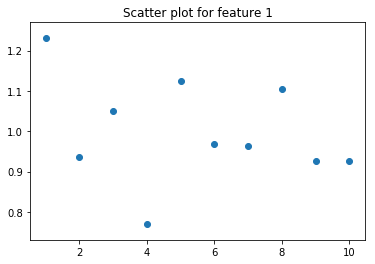

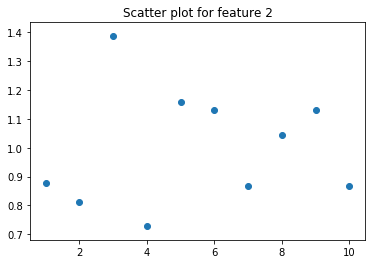

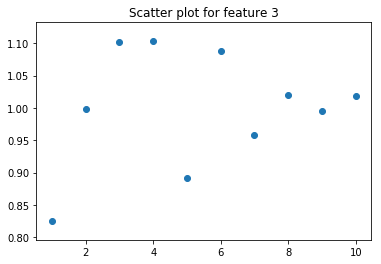

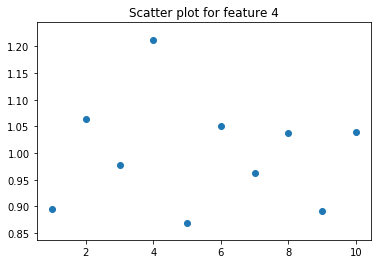

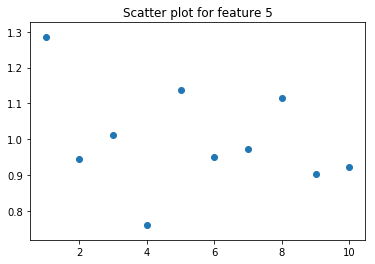

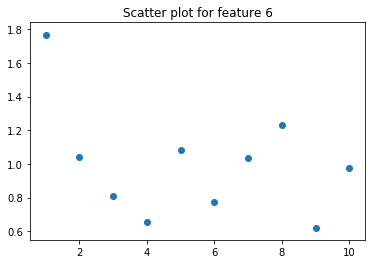

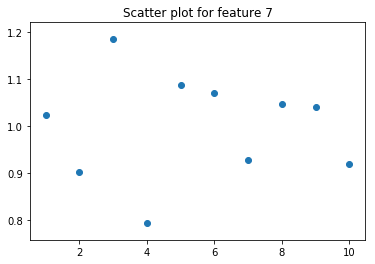

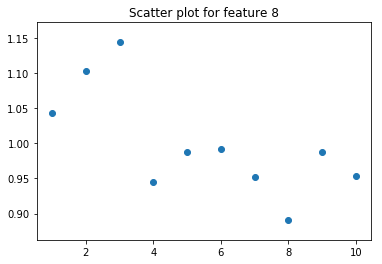

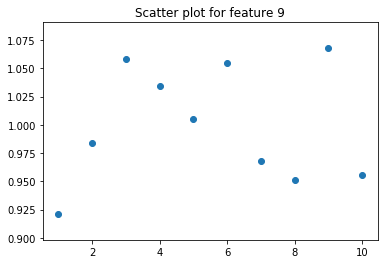

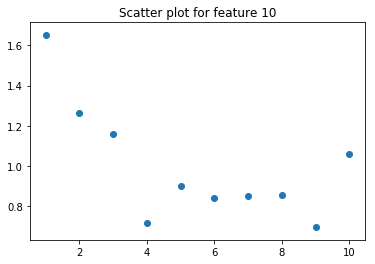

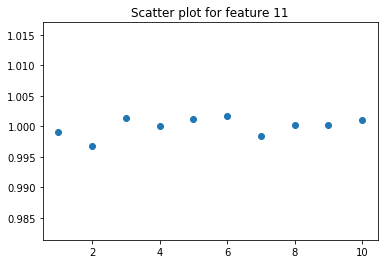

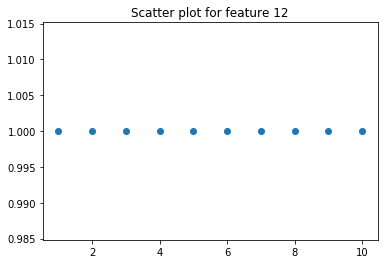

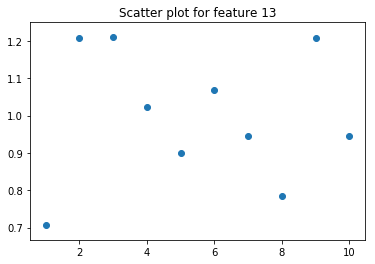

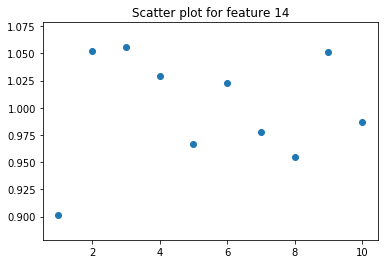

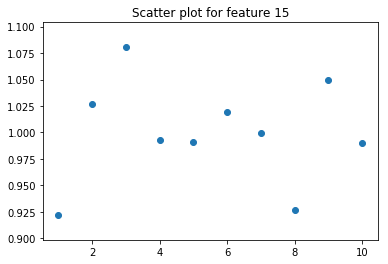

In [31]:
for k in range((15)):
    classes=[1,2,3,4,5,6,7,8,9,10]
    y=np.empty((1,10))
    for i in range(10):
        X_for=X_classes_first_normalized[i]
        y[0,i]=X_for[k]
    plt.scatter(classes,y)
    plt.title('Scatter plot for feature '+str(k+1))
    plt.show()

In [37]:
X_classes_g=[]
for i in range((10)):
    X_for=X_classes[i]
    a=np.mean(X_for[:,:24])
    X_classes_g.append(a)
print(X_classes_g)

[3156.0181480439442, 2400.0683814050703, 2689.1748688650309, 1970.6775462779974, 2883.5639110202496, 2483.6315314102567, 2471.3457399527183, 2828.0952399572652, 2372.5959741847828, 2371.414427810078]


In [ ]:


'''
#first one class classifier
Y_first=np.empty((N,1))
for i in range(N):
    if Y[i]==1:
        Y_first[i]=1
    else:
        Y_first[i]=-1
print(Y_first)
'''3u

## 3. Methods and experiments

*- Explain your whole approach (you can include a block diagram showing the steps in your process).* 

*- What methods/algorithms, why were the methods chosen. *

*- What evaluation methodology (cross CV, etc.).*



In [22]:
# Trials with ML algorithms
def sigmoid_func(z):
    sigmoid=np.ones_like(y)/(1+np.exp(-z))
    return sigmoid

def loss_func(X,y,w):
    
    y_pred=np.dot(X,w)
    print('y_pred',y_pred)
    sig=sigmoid_func(y_pred)
    print('sig',sig)
    loss=np.mean(-y*np.log(sig)-(np.ones_like(y)-y)*np.log(np.ones_like(y)-sig))
    return loss
    
def gradient(X,y,w):
    N = X.shape[0]                    
    Z=np.dot(X,w)                
    sig=sigmoid_func(Z)#(55,1)
    grad=(1/N)*np.dot(np.transpose(X),sig-y)      
    return grad

def logisticRegression_func(X,y,step_size, K): ##go and look for the Matrix-transformation 
    N = X.shape[0]
    d = X.shape[1]
    # Initialize w as 1xd array.
    w = np.zeros((d,1))  #shape (1,d)
    loss = float('inf')
    loss_list=np.empty((K,1))
    for i in range(K):
        grad=gradient(X,y,w)#muss sein (1,3)
        w=w-step_size*grad
        loss= loss_func(X,y,w) #old
        loss_list[i]=loss #old
    return loss_list, w

""" Predict Output """
def predict_output(X,w):
    z=np.dot(X,w)#z(55,1)
    print('z',z)
    y=sigmoid_func(z)
    for i in range(len(X)):
        
        if y[i]>=0.5:
            y[i]=1
        else:
            y[i]=0
    
    return y #y(55,1)

step_size = 1e-5
num_iter = 3000
X=X_first
y=Y_first
e_list, w_opt = logisticRegression_func(X,y,step_size,num_iter)
print ('The optimal weight vector is:', w_opt)
y_hat = predict_output(X,w_opt)

y_pred [[-558065.25375504]
 [-558142.84321425]
 [-558177.0112609 ]
 ..., 
 [-557908.54171553]
 [-558172.53678591]
 [-558047.90899743]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-560094.76647004]
 [-560184.61192079]
 [-560196.35971153]
 ..., 
 [-559952.83998608]
 [-560220.61698966]
 [-560094.97877721]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-562124.27918503]
 [-562226.38062734]
 [-562215.70816216]
 ..., 
 [-561997.13825662]
 [-562268.6971934 ]
 [-562142.04855699]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-564153.79190002]
 [-564268.14933388]
 [-564235.0566128 ]
 ..., 
 [-564041.43652717]
 [-564316.77739715]
 [-564189.11833677]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


y_pred [[-566183.30461501]
 [-566309.91804042]
 [-566254.40506343]
 ..., 
 [-566085.73479772]
 [-566364.85760089]
 [-566236.18811655]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-568212.81733001]
 [-568351.68674696]
 [-568273.75351406]
 ..., 
 [-568130.03306826]
 [-568412.93780464]
 [-568283.25789634]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-570242.330045  ]
 [-570393.4554535 ]
 [-570293.10196469]
 ..., 
 [-570174.33133881]
 [-570461.01800838]
 [-570330.32767612]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-572271.84275999]
 [-572435.22416004]
 [-572312.45041532]
 ..., 
 [-572218.62960936]
 [-572509.09821213]
 [-572377.3974559 ]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-574301.35547498]
 [-574476.99286658]
 [-574331.79886595]
 ..., 
 [-574262.9278799 ]
 [-574557.17841587]
 [-574424.46723568]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-576330.86818998]
 [-576518.76157312]
 [-57635

y_pred [[-655481.86407468]
 [-656147.7411282 ]
 [-655105.73689121]
 ..., 
 [-656034.85870176]
 [-656480.38656568]
 [-656307.25842689]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-657511.37678968]
 [-658189.50983474]
 [-657125.08534184]
 ..., 
 [-658079.1569723 ]
 [-658528.46676942]
 [-658354.32820667]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-659540.88950467]
 [-660231.27854128]
 [-659144.43379247]
 ..., 
 [-660123.45524285]
 [-660576.54697317]
 [-660401.39798645]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-661570.40221966]
 [-662273.04724782]
 [-661163.7822431 ]
 ..., 
 [-662167.7535134 ]
 [-662624.62717691]
 [-662448.46776623]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-663599.91493465]
 [-664314.81595437]
 [-663183.13069373]
 ..., 
 [-664212.05178394]
 [-664672.70738066]
 [-664495.53754601]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-665629.42764965]
 [-666356.58466091]
 [-66520

y_pred [[-746809.93624935]
 [-748027.33292253]
 [-745976.41716962]
 ..., 
 [-748028.28087634]
 [-748643.99573421]
 [-748425.39851701]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-748839.44896434]
 [-750069.10162907]
 [-747995.76562025]
 ..., 
 [-750072.57914689]
 [-750692.07593795]
 [-750472.46829679]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-750868.96167933]
 [-752110.87033561]
 [-750015.11407088]
 ..., 
 [-752116.87741744]
 [-752740.1561417 ]
 [-752519.53807657]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-752898.47439432]
 [-754152.63904215]
 [-752034.46252151]
 ..., 
 [-754161.17568798]
 [-754788.23634545]
 [-754566.60785635]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-754927.98710932]
 [-756194.40774869]
 [-754053.81097214]
 ..., 
 [-756205.47395853]
 [-756836.31654919]
 [-756613.67763613]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-756957.49982431]
 [-758236.17645523]
 [-75607

y_pred [[-840167.521139  ]
 [-841948.6934234 ]
 [-838866.44589866]
 ..., 
 [-842066.00132147]
 [-842855.68510649]
 [-842590.6083869 ]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-842197.03385399]
 [-843990.46212994]
 [-840885.79434929]
 ..., 
 [-844110.29959202]
 [-844903.76531023]
 [-844637.67816669]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-844226.54656899]
 [-846032.23083648]
 [-842905.14279992]
 ..., 
 [-846154.59786257]
 [-846951.84551398]
 [-846684.74794647]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-846256.05928398]
 [-848073.99954302]
 [-844924.49125055]
 ..., 
 [-848198.89613311]
 [-848999.92571772]
 [-848731.81772625]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-848285.57199897]
 [-850115.76824956]
 [-846943.83970118]
 ..., 
 [-850243.19440366]
 [-851048.00592147]
 [-850778.88750603]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-850315.08471396]
 [-852157.5369561 ]
 [-84896

 [-930614.60891746]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-929466.08059867]
 [-931786.51651118]
 [-927717.77772643]
 ..., 
 [-932015.12522551]
 [-932971.21407127]
 [-932661.67869724]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-931495.59331367]
 [-933828.28521772]
 [-929737.12617707]
 ..., 
 [-934059.42349606]
 [-935019.29427502]
 [-934708.74847702]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-933525.10602866]
 [-935870.05392426]
 [-931756.4746277 ]
 ..., 
 [-936103.72176661]
 [-937067.37447876]
 [-936755.8182568 ]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-935554.61874365]
 [-937911.82263081]
 [-933775.82307833]
 ..., 
 [-938148.02003715]
 [-939115.45468251]
 [-938802.88803658]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-937584.13145864]
 [-939953.59133735]
 [-935795.17152896]
 ..., 
 [-940192.3183077 ]
 [-941163.53488625]
 [-940849.95781636]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [

sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1022823.66548833]
 [-1025707.87701205]
 [-1020607.80645548]
 ..., 
 [-1026052.84567065]
 [-1027182.90344355]
 [-1026826.88856714]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1024853.17820332]
 [-1027749.64571859]
 [-1022627.15490611]
 ..., 
 [-1028097.14394119]
 [-1029230.98364729]
 [-1028873.95834692]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1026882.69091831]
 [-1029791.41442513]
 [-1024646.50335674]
 ..., 
 [-1030141.44221174]
 [-1031279.06385104]
 [-1030921.0281267 ]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1028912.20363331]
 [-1031833.18313167]
 [-1026665.85180737]
 ..., 
 [-1032185.74048228]
 [-1033327.14405478]
 [-1032968.09790648]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1030941.7163483 ]
 [-1033874.95183821]
 [-1028685.200258  ]
 ..., 
 [-1034230.03875283]
 [-1035375.22425853]
 [-1035015.16768626]]
sig [[ 0.]
 [ 0.]
 [ 0.]


y_pred [[-1116181.25037798]
 [-1119629.23751292]
 [-1113497.83518452]
 ..., 
 [-1120090.56611578]
 [-1121394.59281582]
 [-1120992.09843703]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1118210.76309298]
 [-1121671.00621946]
 [-1115517.18363515]
 ..., 
 [-1122134.86438632]
 [-1123442.67301957]
 [-1123039.16821681]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1120240.27580797]
 [-1123712.774926  ]
 [-1117536.53208578]
 ..., 
 [-1124179.16265687]
 [-1125490.75322331]
 [-1125086.2379966 ]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1122269.78852296]
 [-1125754.54363254]
 [-1119555.88053641]
 ..., 
 [-1126223.46092742]
 [-1127538.83342706]
 [-1127133.30777638]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1124299.30123795]
 [-1127796.31233908]
 [-1121575.22898704]
 ..., 
 [-1128267.75919796]
 [-1129586.9136308 ]
 [-1129180.37755616]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1126328.8139529

 [-1206969.02918781]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1203450.29712266]
 [-1207425.29189416]
 [-1200329.81856166]
 ..., 
 [-1207995.39174927]
 [-1209462.04157686]
 [-1209016.09896759]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1205479.80983765]
 [-1209467.0606007 ]
 [-1202349.16701229]
 ..., 
 [-1210039.69001982]
 [-1211510.12178061]
 [-1211063.16874737]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1207509.32255265]
 [-1211508.82930725]
 [-1204368.51546293]
 ..., 
 [-1212083.98829036]
 [-1213558.20198435]
 [-1213110.23852715]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1209538.83526764]
 [-1213550.59801379]
 [-1206387.86391356]
 ..., 
 [-1214128.28656091]
 [-1215606.2821881 ]
 [-1215157.30830693]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1211568.34798263]
 [-1215592.36672033]
 [-1208407.21236419]
 ..., 
 [-1216172.58483146]
 [-1217654.36239184]
 [-1217204.37808671]]
sig

y_pred [[-1288689.83115235]
 [-1293179.57756887]
 [-1285142.45348818]
 ..., 
 [-1293855.91911222]
 [-1295481.41013416]
 [-1294993.02971837]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1290719.34386734]
 [-1295221.34627541]
 [-1287161.80193881]
 ..., 
 [-1295900.21738276]
 [-1297529.4903379 ]
 [-1297040.09949815]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1292748.85658233]
 [-1297263.11498195]
 [-1289181.15038944]
 ..., 
 [-1297944.51565331]
 [-1299577.57054165]
 [-1299087.16927793]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1294778.36929733]
 [-1299304.88368849]
 [-1291200.49884007]
 ..., 
 [-1299988.81392386]
 [-1301625.65074539]
 [-1301134.23905771]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1296807.88201232]
 [-1301346.65239503]
 [-1293219.8472907 ]
 ..., 
 [-1302033.1121944 ]
 [-1303673.73094914]
 [-1303181.30883749]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1298837.3947273

 [-1389158.23958826]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1384076.928757  ]
 [-1389142.70677628]
 [-1380051.83066785]
 ..., 
 [-1389937.9378279 ]
 [-1391741.17971018]
 [-1391205.30936804]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1386106.44147199]
 [-1391184.47548282]
 [-1382071.17911848]
 ..., 
 [-1391982.23609844]
 [-1393789.25991393]
 [-1393252.37914782]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1388135.95418698]
 [-1393226.24418936]
 [-1384090.52756911]
 ..., 
 [-1394026.53436899]
 [-1395837.34011767]
 [-1395299.4489276 ]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1390165.46690197]
 [-1395268.0128959 ]
 [-1386109.87601975]
 ..., 
 [-1396070.83263953]
 [-1397885.42032142]
 [-1397346.51870738]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1392194.97961697]
 [-1397309.78160244]
 [-1388129.22447038]
 ..., 
 [-1398115.13091008]
 [-1399933.50052516]
 [-1399393.58848717]]
sig

y_pred [[-1471345.97550167]
 [-1476938.76115752]
 [-1466883.814045  ]
 ..., 
 [-1477842.76346139]
 [-1479808.62847122]
 [-1479229.3098986 ]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1473375.48821667]
 [-1478980.52986406]
 [-1468903.16249563]
 ..., 
 [-1479887.06173193]
 [-1481856.70867497]
 [-1481276.37967838]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1475405.00093166]
 [-1481022.2985706 ]
 [-1470922.51094626]
 ..., 
 [-1481931.36000248]
 [-1483904.78887871]
 [-1483323.44945816]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1477434.51364665]
 [-1483064.06727714]
 [-1472941.85939689]
 ..., 
 [-1483975.65827303]
 [-1485952.86908246]
 [-1485370.51923794]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1479464.02636164]
 [-1485105.83598369]
 [-1474961.20784752]
 ..., 
 [-1486019.95654357]
 [-1488000.9492862 ]
 [-1487417.58901772]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1481493.5390766

y_pred [[-1560644.53496134]
 [-1566776.58424531]
 [-1555735.14587278]
 ..., 
 [-1567791.88736543]
 [-1569924.15743601]
 [-1569300.38020894]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1562674.04767634]
 [-1568818.35295185]
 [-1557754.49432341]
 ..., 
 [-1569836.18563597]
 [-1571972.23763975]
 [-1571347.44998872]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1564703.56039133]
 [-1570860.12165839]
 [-1559773.84277404]
 ..., 
 [-1571880.48390652]
 [-1574020.3178435 ]
 [-1573394.5197685 ]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1566733.07310632]
 [-1572901.89036493]
 [-1561793.19122467]
 ..., 
 [-1573924.78217707]
 [-1576068.39804724]
 [-1575441.58954828]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1568762.58582131]
 [-1574943.65907147]
 [-1563812.5396753 ]
 ..., 
 [-1575969.08044761]
 [-1578116.47825099]
 [-1577488.65932806]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1570792.0985363

sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1651972.60713601]
 [-1658656.17603964]
 [-1646605.82615119]
 ..., 
 [-1659785.30954001]
 [-1662087.76660454]
 [-1661418.52029905]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1654002.119851  ]
 [-1660697.94474618]
 [-1648625.17460182]
 ..., 
 [-1661829.60781056]
 [-1664135.84680828]
 [-1663465.59007883]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1656031.63256599]
 [-1662739.71345272]
 [-1650644.52305245]
 ..., 
 [-1663873.90608111]
 [-1666183.92701203]
 [-1665512.65985861]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1658061.14528099]
 [-1664781.48215926]
 [-1652663.87150308]
 ..., 
 [-1665918.20435165]
 [-1668232.00721577]
 [-1667559.72963839]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1660090.65799598]
 [-1666823.2508658 ]
 [-1654683.21995371]
 ..., 
 [-1667962.5026222 ]
 [-1670280.08741952]
 [-1669606.79941817]]
sig [[ 0.]
 [ 0.]
 [ 0.]


sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1741271.16659568]
 [-1748493.99912742]
 [-1735457.15797897]
 ..., 
 [-1749734.43344405]
 [-1752203.29556932]
 [-1751489.59060939]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1743300.67931067]
 [-1750535.76783396]
 [-1737476.5064296 ]
 ..., 
 [-1751778.7317146 ]
 [-1754251.37577307]
 [-1753536.66038917]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1745330.19202566]
 [-1752577.5365405 ]
 [-1739495.85488023]
 ..., 
 [-1753823.02998515]
 [-1756299.45597681]
 [-1755583.73016895]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1747359.70474066]
 [-1754619.30524704]
 [-1741515.20333086]
 ..., 
 [-1755867.32825569]
 [-1758347.53618056]
 [-1757630.79994873]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1749389.21745565]
 [-1756661.07395359]
 [-1743534.55178149]
 ..., 
 [-1757911.62652624]
 [-1760395.6163843 ]
 [-1759677.86972851]]
sig [[ 0.]
 [ 0.]
 [ 0.]


y_pred [[-1830569.72605535]
 [-1838331.82221521]
 [-1824308.48980674]
 ..., 
 [-1839683.55734809]
 [-1842318.82453411]
 [-1841560.66091972]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1832599.23877034]
 [-1840373.59092175]
 [-1826327.83825738]
 ..., 
 [-1841727.85561864]
 [-1844366.90473785]
 [-1843607.73069951]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1834628.75148533]
 [-1842415.35962829]
 [-1828347.18670801]
 ..., 
 [-1843772.15388918]
 [-1846414.9849416 ]
 [-1845654.80047929]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1836658.26420033]
 [-1844457.12833483]
 [-1830366.53515864]
 ..., 
 [-1845816.45215973]
 [-1848463.06514534]
 [-1847701.87025907]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1838687.77691532]
 [-1846498.89704137]
 [-1832385.88360927]
 ..., 
 [-1847860.75043028]
 [-1850511.14534909]
 [-1849748.94003885]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1840717.2896303

y_pred [[-1919868.28551502]
 [-1928169.645303  ]
 [-1913159.82163452]
 ..., 
 [-1929632.68125213]
 [-1932434.35349889]
 [-1931631.73123006]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1921897.79823001]
 [-1930211.41400954]
 [-1915179.17008515]
 ..., 
 [-1931676.97952268]
 [-1934482.43370264]
 [-1933678.80100984]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1923927.310945  ]
 [-1932253.18271608]
 [-1917198.51853579]
 ..., 
 [-1933721.27779322]
 [-1936530.51390638]
 [-1935725.87078962]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1925956.82366   ]
 [-1934294.95142262]
 [-1919217.86698642]
 ..., 
 [-1935765.57606377]
 [-1938578.59411013]
 [-1937772.9405694 ]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1927986.33637499]
 [-1936336.72012916]
 [-1921237.21543705]
 ..., 
 [-1937809.87433432]
 [-1940626.67431387]
 [-1939820.01034918]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-1930015.8490899

 [ 0.]]
y_pred [[-2009166.84497469]
 [-2018007.46839078]
 [-2002011.1534623 ]
 ..., 
 [-2019581.80515617]
 [-2022549.88246368]
 [-2021702.8015404 ]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2011196.35768968]
 [-2020049.23709732]
 [-2004030.50191293]
 ..., 
 [-2021626.10342672]
 [-2024597.96266742]
 [-2023749.87132018]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2013225.87040468]
 [-2022091.00580386]
 [-2006049.85036356]
 ..., 
 [-2023670.40169726]
 [-2026646.04287117]
 [-2025796.94109996]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2015255.38311967]
 [-2024132.7745104 ]
 [-2008069.1988142 ]
 ..., 
 [-2025714.69996781]
 [-2028694.12307492]
 [-2027844.01087974]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2017284.89583466]
 [-2026174.54321694]
 [-2010088.54726483]
 ..., 
 [-2027758.99823836]
 [-2030742.20327866]
 [-2029891.08065952]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2019314

 [-2107679.73229117]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2096435.89171937]
 [-2105803.52277203]
 [-2088843.13683945]
 ..., 
 [-2107486.63078966]
 [-2110617.33122472]
 [-2109726.80207095]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2098465.40443436]
 [-2107845.29147857]
 [-2090862.48529008]
 ..., 
 [-2109530.92906021]
 [-2112665.41142847]
 [-2111773.87185073]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2100494.91714935]
 [-2109887.06018511]
 [-2092881.83374071]
 ..., 
 [-2111575.22733076]
 [-2114713.49163221]
 [-2113820.94163051]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2102524.42986435]
 [-2111928.82889165]
 [-2094901.18219134]
 ..., 
 [-2113619.5256013 ]
 [-2116761.57183596]
 [-2115868.01141029]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2104553.94257934]
 [-2113970.59759819]
 [-2096920.53064197]
 ..., 
 [-2115663.82387185]
 [-2118809.6520397 ]
 [-2117915.08119007]]
sig

sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2183704.93846405]
 [-2193599.57715327]
 [-2175675.1202166 ]
 ..., 
 [-2195391.45642316]
 [-2198684.77998576]
 [-2197750.80260151]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2185734.45117904]
 [-2195641.34585981]
 [-2177694.46866723]
 ..., 
 [-2197435.7546937 ]
 [-2200732.86018951]
 [-2199797.87238129]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2187763.96389403]
 [-2197683.11456636]
 [-2179713.81711786]
 ..., 
 [-2199480.05296425]
 [-2202780.94039325]
 [-2201844.94216107]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2189793.47660902]
 [-2199724.8832729 ]
 [-2181733.16556849]
 ..., 
 [-2201524.3512348 ]
 [-2204829.020597  ]
 [-2203892.01194085]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2191822.98932402]
 [-2201766.65197944]
 [-2183752.51401912]
 ..., 
 [-2203568.64950534]
 [-2206877.10080074]
 [-2205939.08172063]]
sig [[ 0.]
 [ 0.]
 [ 0.]


y_pred [[-2279092.03606869]
 [-2289562.70636068]
 [-2270584.49739627]
 ..., 
 [-2291473.47513883]
 [-2294944.54956178]
 [-2293963.08225119]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2281121.54878369]
 [-2291604.47506722]
 [-2272603.8458469 ]
 ..., 
 [-2293517.77340938]
 [-2296992.62976553]
 [-2296010.15203097]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2283151.06149868]
 [-2293646.24377376]
 [-2274623.19429753]
 ..., 
 [-2295562.07167993]
 [-2299040.70996927]
 [-2298057.22181075]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2285180.57421367]
 [-2295688.0124803 ]
 [-2276642.54274816]
 ..., 
 [-2297606.36995047]
 [-2301088.79017302]
 [-2300104.29159053]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2287210.08692866]
 [-2297729.78118684]
 [-2278661.89119879]
 ..., 
 [-2299650.66822102]
 [-2303136.87037676]
 [-2302151.36137031]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2289239.5996436

y_pred [[-2368390.59552837]
 [-2379400.52944847]
 [-2359435.82922405]
 ..., 
 [-2381422.59904287]
 [-2385060.07852657]
 [-2384034.15256152]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2370420.10824336]
 [-2381442.29815501]
 [-2361455.17767468]
 ..., 
 [-2383466.89731342]
 [-2387108.15873031]
 [-2386081.2223413 ]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2372449.62095835]
 [-2383484.06686155]
 [-2363474.52612531]
 ..., 
 [-2385511.19558397]
 [-2389156.23893406]
 [-2388128.29212108]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2374479.13367334]
 [-2385525.83556809]
 [-2365493.87457594]
 ..., 
 [-2387555.49385451]
 [-2391204.3191378 ]
 [-2390175.36190086]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2376508.64638834]
 [-2387567.60427463]
 [-2367513.22302657]
 ..., 
 [-2389599.79212506]
 [-2393252.39934155]
 [-2392222.43168064]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2378538.1591033

 [ 0.]]
y_pred [[-2457689.15498804]
 [-2469238.35253625]
 [-2448287.16105182]
 ..., 
 [-2471371.72294691]
 [-2475175.60749135]
 [-2474105.22287186]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2459718.66770303]
 [-2471280.1212428 ]
 [-2450306.50950246]
 ..., 
 [-2473416.02121746]
 [-2477223.6876951 ]
 [-2476152.29265164]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2461748.18041802]
 [-2473321.88994934]
 [-2452325.85795309]
 ..., 
 [-2475460.31948801]
 [-2479271.76789884]
 [-2478199.36243142]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2463777.69313301]
 [-2475363.65865588]
 [-2454345.20640372]
 ..., 
 [-2477504.61775855]
 [-2481319.84810259]
 [-2480246.4322112 ]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2465807.20584801]
 [-2477405.42736242]
 [-2456364.55485435]
 ..., 
 [-2479548.9160291 ]
 [-2483367.92830633]
 [-2482293.50199098]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2467836

y_pred [[-2546987.71444771]
 [-2559076.17562404]
 [-2537138.4928796 ]
 ..., 
 [-2561320.84685095]
 [-2565291.13645614]
 [-2564176.2931822 ]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2549017.2271627 ]
 [-2561117.94433058]
 [-2539157.84133023]
 ..., 
 [-2563365.1451215 ]
 [-2567339.21665988]
 [-2566223.36296198]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2551046.73987769]
 [-2563159.71303712]
 [-2541177.18978087]
 ..., 
 [-2565409.44339205]
 [-2569387.29686363]
 [-2568270.43274176]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2553076.25259268]
 [-2565201.48174366]
 [-2543196.5382315 ]
 ..., 
 [-2567453.74166259]
 [-2571435.37706737]
 [-2570317.50252154]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2555105.76530768]
 [-2567243.2504502 ]
 [-2545215.88668213]
 ..., 
 [-2569498.03993314]
 [-2573483.45727112]
 [-2572364.57230132]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2557135.2780226

 [-2656294.43327231]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2640345.29933736]
 [-2652997.53612491]
 [-2630028.52160864]
 ..., 
 [-2655358.56729608]
 [-2659502.82582842]
 [-2658341.50305209]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2642374.81205235]
 [-2655039.30483145]
 [-2632047.87005928]
 ..., 
 [-2657402.86556663]
 [-2661550.90603216]
 [-2660388.57283187]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2644404.32476735]
 [-2657081.07353799]
 [-2634067.21850991]
 ..., 
 [-2659447.16383718]
 [-2663598.9862359 ]
 [-2662435.64261165]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2646433.83748234]
 [-2659122.84224453]
 [-2636086.56696054]
 ..., 
 [-2661491.46210772]
 [-2665647.06643965]
 [-2664482.71239143]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2648463.35019733]
 [-2661164.61095107]
 [-2638105.91541117]
 ..., 
 [-2663535.76037827]
 [-2667695.1466434 ]
 [-2666529.78217121]]
sig

y_pred [[-2729643.85879704]
 [-2742835.3592127 ]
 [-2718879.85343643]
 ..., 
 [-2745307.69120013]
 [-2749618.35479321]
 [-2748412.57336244]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2731673.37151204]
 [-2744877.12791925]
 [-2720899.20188706]
 ..., 
 [-2747351.98947068]
 [-2751666.43499696]
 [-2750459.64314222]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2733702.88422703]
 [-2746918.89662579]
 [-2722918.5503377 ]
 ..., 
 [-2749396.28774123]
 [-2753714.5152007 ]
 [-2752506.712922  ]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2735732.39694202]
 [-2748960.66533233]
 [-2724937.89878833]
 ..., 
 [-2751440.58601177]
 [-2755762.59540445]
 [-2754553.78270178]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2737761.90965701]
 [-2751002.43403887]
 [-2726957.24723896]
 ..., 
 [-2753484.88428232]
 [-2757810.67560819]
 [-2756600.85248156]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2739791.4223720

y_pred [[-2816912.90554173]
 [-2830631.41359396]
 [-2805711.83681359]
 ..., 
 [-2833212.51683364]
 [-2837685.80355426]
 [-2836436.57389301]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2818942.41825673]
 [-2832673.1823005 ]
 [-2807731.18526422]
 ..., 
 [-2835256.81510419]
 [-2839733.88375801]
 [-2838483.64367279]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2820971.93097172]
 [-2834714.95100704]
 [-2809750.53371486]
 ..., 
 [-2837301.11337473]
 [-2841781.96396175]
 [-2840530.71345257]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2823001.44368671]
 [-2836756.71971359]
 [-2811769.88216549]
 ..., 
 [-2839345.41164528]
 [-2843830.0441655 ]
 [-2842577.78323235]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2825030.9564017 ]
 [-2838798.48842013]
 [-2813789.23061612]
 ..., 
 [-2841389.70991583]
 [-2845878.12436924]
 [-2844624.85301213]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2827060.4691167

y_pred [[-2906211.46500142]
 [-2920469.23668176]
 [-2894563.16864138]
 ..., 
 [-2923161.64073769]
 [-2927801.33251906]
 [-2926507.64420336]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2908240.97771641]
 [-2922511.0053883 ]
 [-2896582.51709202]
 ..., 
 [-2925205.93900824]
 [-2929849.41272281]
 [-2928554.71398314]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2910270.4904314 ]
 [-2924552.77409484]
 [-2898601.86554265]
 ..., 
 [-2927250.23727878]
 [-2931897.49292655]
 [-2930601.78376292]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2912300.0031464 ]
 [-2926594.54280139]
 [-2900621.21399328]
 ..., 
 [-2929294.53554933]
 [-2933945.5731303 ]
 [-2932648.8535427 ]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2914329.51586139]
 [-2928636.31150793]
 [-2902640.56244391]
 ..., 
 [-2931338.83381988]
 [-2935993.65333404]
 [-2934695.92332248]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2916359.0285763

sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-2999569.04989109]
 [-3014390.59718264]
 [-2987453.19737044]
 ..., 
 [-3017199.36118284]
 [-3022013.02189135]
 [-3020672.85407327]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3001598.56260608]
 [-3016432.36588918]
 [-2989472.54582107]
 ..., 
 [-3019243.65945338]
 [-3024061.1020951 ]
 [-3022719.92385305]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3003628.07532107]
 [-3018474.13459573]
 [-2991491.8942717 ]
 ..., 
 [-3021287.95772393]
 [-3026109.18229884]
 [-3024766.99363283]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3005657.58803606]
 [-3020515.90330227]
 [-2993511.24272233]
 ..., 
 [-3023332.25599448]
 [-3028157.26250259]
 [-3026814.06341261]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3007687.10075106]
 [-3022557.67200881]
 [-2995530.59117296]
 ..., 
 [-3025376.55426502]
 [-3030205.34270633]
 [-3028861.13319239]]
sig [[ 0.]
 [ 0.]
 [ 0.]


sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3092926.63478076]
 [-3108311.95768352]
 [-3080343.22609949]
 ..., 
 [-3111237.08162798]
 [-3116224.71126364]
 [-3114838.06394318]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3094956.14749575]
 [-3110353.72639007]
 [-3082362.57455012]
 ..., 
 [-3113281.37989853]
 [-3118272.79146739]
 [-3116885.13372296]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3096985.66021074]
 [-3112395.49509661]
 [-3084381.92300076]
 ..., 
 [-3115325.67816908]
 [-3120320.87167113]
 [-3118932.20350274]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3099015.17292573]
 [-3114437.26380315]
 [-3086401.27145139]
 ..., 
 [-3117369.97643962]
 [-3122368.95187488]
 [-3120979.27328252]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3101044.68564073]
 [-3116479.03250969]
 [-3088420.61990202]
 ..., 
 [-3119414.27471017]
 [-3124417.03207862]
 [-3123026.3430623 ]]
sig [[ 0.]
 [ 0.]
 [ 0.]


sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3180195.68152545]
 [-3196108.01206478]
 [-3167175.20947665]
 ..., 
 [-3199141.90726149]
 [-3204292.16002469]
 [-3202862.06447375]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3182225.19424044]
 [-3198149.78077132]
 [-3169194.55792728]
 ..., 
 [-3201186.20553203]
 [-3206340.24022844]
 [-3204909.13425353]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3184254.70695543]
 [-3200191.54947786]
 [-3171213.90637792]
 ..., 
 [-3203230.50380258]
 [-3208388.32043218]
 [-3206956.20403331]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3186284.21967042]
 [-3202233.31818441]
 [-3173233.25482855]
 ..., 
 [-3205274.80207313]
 [-3210436.40063593]
 [-3209003.27381309]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3188313.73238542]
 [-3204275.08689095]
 [-3175252.60327918]
 ..., 
 [-3207319.10034367]
 [-3212484.48083968]
 [-3211050.34359287]]
sig [[ 0.]
 [ 0.]
 [ 0.]


y_pred [[-3265435.21555514]
 [-3281862.2977395 ]
 [-3251987.84440318]
 ..., 
 [-3285002.43462445]
 [-3290311.528582  ]
 [-3288838.99522453]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3267464.72827014]
 [-3283904.06644604]
 [-3254007.19285381]
 ..., 
 [-3287046.73289499]
 [-3292359.60878575]
 [-3290886.06500431]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3269494.24098513]
 [-3285945.83515258]
 [-3256026.54130444]
 ..., 
 [-3289091.03116554]
 [-3294407.68898949]
 [-3292933.1347841 ]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3271523.75370012]
 [-3287987.60385912]
 [-3258045.88975508]
 ..., 
 [-3291135.32943609]
 [-3296455.76919324]
 [-3294980.20456388]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3273553.26641511]
 [-3290029.37256566]
 [-3260065.23820571]
 ..., 
 [-3293179.62770663]
 [-3298503.84939698]
 [-3297027.27434366]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3275582.7791301

sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3352704.26229983]
 [-3369658.35212076]
 [-3338819.82778034]
 ..., 
 [-3372907.26025795]
 [-3378378.97734305]
 [-3376862.9957551 ]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3354733.77501483]
 [-3371700.1208273 ]
 [-3340839.17623097]
 ..., 
 [-3374951.5585285 ]
 [-3380427.0575468 ]
 [-3378910.06553488]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3356763.28772982]
 [-3373741.88953384]
 [-3342858.5246816 ]
 ..., 
 [-3376995.85679905]
 [-3382475.13775055]
 [-3380957.13531466]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3358792.80044481]
 [-3375783.65824038]
 [-3344877.87313223]
 ..., 
 [-3379040.15506959]
 [-3384523.21795429]
 [-3383004.20509444]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3360822.31315981]
 [-3377825.42694692]
 [-3346897.22158287]
 ..., 
 [-3381084.45334014]
 [-3386571.29815804]
 [-3385051.27487422]]
sig [[ 0.]
 [ 0.]
 [ 0.]


y_pred [[-3437943.79632953]
 [-3455412.63779548]
 [-3423632.46270687]
 ..., 
 [-3458767.78762091]
 [-3464398.34590036]
 [-3462839.92650589]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3439973.30904453]
 [-3457454.40650202]
 [-3425651.8111575 ]
 ..., 
 [-3460812.08589146]
 [-3466446.42610411]
 [-3464886.99628567]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3442002.82175952]
 [-3459496.17520856]
 [-3427671.15960813]
 ..., 
 [-3462856.38416201]
 [-3468494.50630785]
 [-3466934.06606545]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3444032.33447451]
 [-3461537.9439151 ]
 [-3429690.50805876]
 ..., 
 [-3464900.68243255]
 [-3470542.5865116 ]
 [-3468981.13584523]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3446061.8471895 ]
 [-3463579.71262164]
 [-3431709.85650939]
 ..., 
 [-3466944.9807031 ]
 [-3472590.66671534]
 [-3471028.20562501]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3448091.3599045

y_pred [[-3531301.3812192 ]
 [-3549333.99829636]
 [-3516522.49143592]
 ..., 
 [-3552805.50806606]
 [-3558610.03527265]
 [-3557005.1363758 ]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3533330.89393419]
 [-3551375.7670029 ]
 [-3518541.83988655]
 ..., 
 [-3554849.8063366 ]
 [-3560658.1154764 ]
 [-3559052.20615558]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3535360.40664919]
 [-3553417.53570944]
 [-3520561.18833719]
 ..., 
 [-3556894.10460715]
 [-3562706.19568014]
 [-3561099.27593536]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3537389.91936418]
 [-3555459.30441598]
 [-3522580.53678782]
 ..., 
 [-3558938.4028777 ]
 [-3564754.27588389]
 [-3563146.34571514]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3539419.43207917]
 [-3557501.07312252]
 [-3524599.88523845]
 ..., 
 [-3560982.70114824]
 [-3566802.35608763]
 [-3565193.41549492]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3541448.9447941

y_pred [[-3624658.96610887]
 [-3643255.35879724]
 [-3609412.52016498]
 ..., 
 [-3646843.2285112 ]
 [-3652821.72464494]
 [-3651170.34624571]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3626688.47882386]
 [-3645297.12750378]
 [-3611431.86861561]
 ..., 
 [-3648887.52678175]
 [-3654869.80484869]
 [-3653217.41602549]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3628717.99153886]
 [-3647338.89621032]
 [-3613451.21706624]
 ..., 
 [-3650931.8250523 ]
 [-3656917.88505243]
 [-3655264.48580527]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3630747.50425385]
 [-3649380.66491686]
 [-3615470.56551687]
 ..., 
 [-3652976.12332284]
 [-3658965.96525618]
 [-3657311.55558505]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3632777.01696884]
 [-3651422.4336234 ]
 [-3617489.9139675 ]
 ..., 
 [-3655020.42159339]
 [-3661014.04545992]
 [-3659358.62536483]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3634806.5296838

 [ 0.]]
y_pred [[-3713957.52556855]
 [-3733093.18188504]
 [-3698263.85199277]
 ..., 
 [-3736792.35241526]
 [-3742937.25360974]
 [-3741241.41655606]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3715987.03828355]
 [-3735134.95059158]
 [-3700283.2004434 ]
 ..., 
 [-3738836.6506858 ]
 [-3744985.33381348]
 [-3743288.48633584]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3718016.55099854]
 [-3737176.71929812]
 [-3702302.54889403]
 ..., 
 [-3740880.94895635]
 [-3747033.41401723]
 [-3745335.55611562]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3720046.06371353]
 [-3739218.48800466]
 [-3704321.89734466]
 ..., 
 [-3742925.2472269 ]
 [-3749081.49422098]
 [-3747382.6258954 ]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3722075.57642853]
 [-3741260.2567112 ]
 [-3706341.24579529]
 ..., 
 [-3744969.54549744]
 [-3751129.57442472]
 [-3749429.69567518]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3724105

y_pred [[-3803256.08502824]
 [-3822931.00497284]
 [-3787115.18382056]
 ..., 
 [-3826741.47631931]
 [-3833052.78257454]
 [-3831312.48686641]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3805285.59774323]
 [-3824972.77367938]
 [-3789134.53227119]
 ..., 
 [-3828785.77458985]
 [-3835100.86277828]
 [-3833359.55664619]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3807315.11045822]
 [-3827014.54238592]
 [-3791153.88072182]
 ..., 
 [-3830830.0728604 ]
 [-3837148.94298203]
 [-3835406.62642597]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3809344.62317322]
 [-3829056.31109246]
 [-3793173.22917245]
 ..., 
 [-3832874.37113095]
 [-3839197.02318577]
 [-3837453.69620575]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3811374.13588821]
 [-3831098.079799  ]
 [-3795192.57762309]
 ..., 
 [-3834918.66940149]
 [-3841245.10338952]
 [-3839500.76598553]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3813403.6486032

 [-3917289.4176172 ]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3890525.13177293]
 [-3910727.05935409]
 [-3873947.16719772]
 ..., 
 [-3914646.30195281]
 [-3921120.23133559]
 [-3919336.48739698]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3892554.64448792]
 [-3912768.82806064]
 [-3875966.51564835]
 ..., 
 [-3916690.60022336]
 [-3923168.31153934]
 [-3921383.55717676]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3894584.15720291]
 [-3914810.59676718]
 [-3877985.86409898]
 ..., 
 [-3918734.89849391]
 [-3925216.39174308]
 [-3923430.62695654]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3896613.66991791]
 [-3916852.36547372]
 [-3880005.21254961]
 ..., 
 [-3920779.19676445]
 [-3927264.47194683]
 [-3925477.69673632]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3898643.1826329 ]
 [-3918894.13418026]
 [-3882024.56100025]
 ..., 
 [-3922823.495035  ]
 [-3929312.55215057]
 [-3927524.7665161 ]]
sig

sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3979823.69123261]
 [-4000564.88244189]
 [-3962798.49902551]
 ..., 
 [-4004595.42585687]
 [-4011235.76030039]
 [-4009407.55770733]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3981853.2039476 ]
 [-4002606.65114843]
 [-3964817.84747614]
 ..., 
 [-4006639.72412741]
 [-4013283.84050414]
 [-4011454.62748711]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3983882.7166626 ]
 [-4004648.41985498]
 [-3966837.19592677]
 ..., 
 [-4008684.02239796]
 [-4015331.92070788]
 [-4013501.69726689]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3985912.22937759]
 [-4006690.18856152]
 [-3968856.5443774 ]
 ..., 
 [-4010728.3206685 ]
 [-4017380.00091163]
 [-4015548.76704667]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-3987941.74209258]
 [-4008731.95726806]
 [-3970875.89282804]
 ..., 
 [-4012772.61893905]
 [-4019428.08111537]
 [-4017595.83682645]]
sig [[ 0.]
 [ 0.]
 [ 0.]


sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4156391.29743699]
 [-4178198.75991095]
 [-4138481.81423046]
 ..., 
 [-4182449.37539442]
 [-4189418.73802624]
 [-4187502.62854824]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4158420.81015198]
 [-4180240.52861749]
 [-4140501.16268109]
 ..., 
 [-4184493.67366497]
 [-4191466.81822999]
 [-4189549.69832802]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4160450.32286697]
 [-4182282.29732403]
 [-4142520.51113172]
 ..., 
 [-4186537.97193552]
 [-4193514.89843373]
 [-4191596.76810781]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4162479.83558196]
 [-4184324.06603057]
 [-4144539.85958236]
 ..., 
 [-4188582.27020606]
 [-4195562.97863748]
 [-4193643.83788759]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4164509.34829696]
 [-4186365.83473711]
 [-4146559.20803299]
 ..., 
 [-4190626.56847661]
 [-4197611.05884122]
 [-4195690.90766737]]
sig [[ 0.]
 [ 0.]
 [ 0.]


 [ 0.]]
y_pred [[-4241630.83146668]
 [-4263953.04558567]
 [-4223294.44915699]
 ..., 
 [-4268309.90275738]
 [-4275438.10658355]
 [-4273479.55929903]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4243660.34418168]
 [-4265994.81429221]
 [-4225313.79760762]
 ..., 
 [-4270354.20102793]
 [-4277486.18678729]
 [-4275526.62907881]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4245689.85689667]
 [-4268036.58299875]
 [-4227333.14605825]
 ..., 
 [-4272398.49929847]
 [-4279534.26699104]
 [-4277573.69885859]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4247719.36961166]
 [-4270078.35170529]
 [-4229352.49450888]
 ..., 
 [-4274442.79756902]
 [-4281582.34719478]
 [-4279620.76863837]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4249748.88232666]
 [-4272120.12041183]
 [-4231371.84295951]
 ..., 
 [-4276487.09583957]
 [-4283630.42739853]
 [-4281667.83841815]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4251778

sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4330929.39092637]
 [-4353790.86867347]
 [-4312145.78098478]
 ..., 
 [-4358259.02666143]
 [-4365553.63554835]
 [-4363550.62960938]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4332958.90364136]
 [-4355832.63738001]
 [-4314165.12943541]
 ..., 
 [-4360303.32493198]
 [-4367601.71575209]
 [-4365597.69938916]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4334988.41635635]
 [-4357874.40608655]
 [-4316184.47788604]
 ..., 
 [-4362347.62320253]
 [-4369649.79595584]
 [-4367644.76916894]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4337017.92907135]
 [-4359916.17479309]
 [-4318203.82633668]
 ..., 
 [-4364391.92147307]
 [-4371697.87615958]
 [-4369691.83894872]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4339047.44178634]
 [-4361957.94349963]
 [-4320223.17478731]
 ..., 
 [-4366436.21974362]
 [-4373745.95636333]
 [-4371738.9087285 ]]
sig [[ 0.]
 [ 0.]
 [ 0.]


 [-4453621.69991973]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4422257.46310104]
 [-4445670.46046781]
 [-4403016.4612632 ]
 ..., 
 [-4450252.44883603]
 [-4457717.24471689]
 [-4455668.76969951]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4424286.97581603]
 [-4447712.22917435]
 [-4405035.80971383]
 ..., 
 [-4452296.74710658]
 [-4459765.32492064]
 [-4457715.83947929]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4426316.48853103]
 [-4449753.99788089]
 [-4407055.15816447]
 ..., 
 [-4454341.04537713]
 [-4461813.40512438]
 [-4459762.90925907]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4428346.00124602]
 [-4451795.76658743]
 [-4409074.5066151 ]
 ..., 
 [-4456385.34364767]
 [-4463861.48532813]
 [-4461809.97903885]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4430375.51396101]
 [-4453837.53529397]
 [-4411093.85506573]
 ..., 
 [-4458429.64191822]
 [-4465909.56553187]
 [-4463857.04881863]]
sig

y_pred [[-4515615.04799071]
 [-4539591.82096869]
 [-4495906.48999226]
 ..., 
 [-4544290.16928118]
 [-4551928.93408918]
 [-4549833.97956942]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4517644.5607057 ]
 [-4541633.58967523]
 [-4497925.83844289]
 ..., 
 [-4546334.46755172]
 [-4553977.01429293]
 [-4551881.0493492 ]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4519674.0734207 ]
 [-4543675.35838177]
 [-4499945.18689352]
 ..., 
 [-4548378.76582227]
 [-4556025.09449667]
 [-4553928.11912898]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4521703.58613569]
 [-4545717.12708831]
 [-4501964.53534415]
 ..., 
 [-4550423.06409282]
 [-4558073.17470042]
 [-4555975.18890876]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4523733.09885068]
 [-4547758.89579485]
 [-4503983.88379478]
 ..., 
 [-4552467.36236336]
 [-4560121.25490416]
 [-4558022.25868854]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4525762.6115656

sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4604913.6074504 ]
 [-4629429.64405649]
 [-4584757.82182005]
 ..., 
 [-4634239.29318523]
 [-4642044.46305398]
 [-4639905.04987977]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4606943.12016539]
 [-4631471.41276303]
 [-4586777.17027068]
 ..., 
 [-4636283.59145578]
 [-4644092.54325772]
 [-4641952.11965955]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4608972.63288038]
 [-4633513.18146957]
 [-4588796.51872131]
 ..., 
 [-4638327.88972632]
 [-4646140.62346147]
 [-4643999.18943933]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4611002.14559537]
 [-4635554.95017611]
 [-4590815.86717194]
 ..., 
 [-4640372.18799687]
 [-4648188.70366521]
 [-4646046.25921911]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4613031.65831037]
 [-4637596.71888265]
 [-4592835.21562258]
 ..., 
 [-4642416.48626742]
 [-4650236.78386896]
 [-4648093.32899889]]
sig [[ 0.]
 [ 0.]
 [ 0.]


y_pred [[-4696241.67962507]
 [-4721309.23585083]
 [-4675628.50209847]
 ..., 
 [-4726232.71535983]
 [-4734208.07222252]
 [-4732023.1899699 ]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4698271.19234006]
 [-4723351.00455737]
 [-4677647.8505491 ]
 ..., 
 [-4728277.01363038]
 [-4736256.15242627]
 [-4734070.25974968]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4700300.70505506]
 [-4725392.77326391]
 [-4679667.19899974]
 ..., 
 [-4730321.31190092]
 [-4738304.23263001]
 [-4736117.32952946]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4702330.21777005]
 [-4727434.54197045]
 [-4681686.54745037]
 ..., 
 [-4732365.61017147]
 [-4740352.31283376]
 [-4738164.39930924]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4704359.73048504]
 [-4729476.31067699]
 [-4683705.895901  ]
 ..., 
 [-4734409.90844202]
 [-4742400.3930375 ]
 [-4740211.46908902]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4706389.2432000

 [ 0.]]
y_pred [[-4787569.75179975]
 [-4813188.82764517]
 [-4766499.18237689]
 ..., 
 [-4818226.13753443]
 [-4826371.68139107]
 [-4824141.33006003]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4789599.26451474]
 [-4815230.59635171]
 [-4768518.53082753]
 ..., 
 [-4820270.43580498]
 [-4828419.76159481]
 [-4826188.39983981]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4791628.77722973]
 [-4817272.36505825]
 [-4770537.87927816]
 ..., 
 [-4822314.73407552]
 [-4830467.84179856]
 [-4828235.46961959]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4793658.28994473]
 [-4819314.13376479]
 [-4772557.22772879]
 ..., 
 [-4824359.03234607]
 [-4832515.9220023 ]
 [-4830282.53939937]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4795687.80265972]
 [-4821355.90247133]
 [-4774576.57617942]
 ..., 
 [-4826403.33061661]
 [-4834564.00220605]
 [-4832329.60917915]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4797717

 [-4914212.40037038]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4878897.82397442]
 [-4905068.41943951]
 [-4857369.86265532]
 ..., 
 [-4910219.55970903]
 [-4918535.29055961]
 [-4916259.47015016]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4880927.33668942]
 [-4907110.18814605]
 [-4859389.21110595]
 ..., 
 [-4912263.85797957]
 [-4920583.37076336]
 [-4918306.53992994]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4882956.84940441]
 [-4909151.95685259]
 [-4861408.55955658]
 ..., 
 [-4914308.15625012]
 [-4922631.4509671 ]
 [-4920353.60970972]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4884986.3621194 ]
 [-4911193.72555913]
 [-4863427.90800721]
 ..., 
 [-4916352.45452067]
 [-4924679.53117085]
 [-4922400.6794895 ]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4887015.8748344 ]
 [-4913235.49426567]
 [-4865447.25645784]
 ..., 
 [-4918396.75279121]
 [-4926727.61137459]
 [-4924447.74926928]]
sig

 [-5008377.61024029]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4972255.40886409]
 [-4998989.77994039]
 [-4950259.89138437]
 ..., 
 [-5004257.28015417]
 [-5012746.9799319 ]
 [-5010424.68002007]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4974284.92157909]
 [-5001031.54864693]
 [-4952279.239835  ]
 ..., 
 [-5006301.57842472]
 [-5014795.06013565]
 [-5012471.74979985]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4976314.43429408]
 [-5003073.31735347]
 [-4954298.58828564]
 ..., 
 [-5008345.87669527]
 [-5016843.14033939]
 [-5014518.81957963]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4978343.94700907]
 [-5005115.08606001]
 [-4956317.93673627]
 ..., 
 [-5010390.17496581]
 [-5018891.22054314]
 [-5016565.88935941]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-4980373.45972406]
 [-5007156.85476655]
 [-4958337.2851869 ]
 ..., 
 [-5012434.47323636]
 [-5020939.30074688]
 [-5018612.95913919]]
sig

y_pred [[-5057494.94289379]
 [-5084744.06561511]
 [-5035072.5263109 ]
 ..., 
 [-5090117.80751713]
 [-5098766.34848921]
 [-5096401.61077086]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5059524.45560878]
 [-5086785.83432165]
 [-5037091.87476153]
 ..., 
 [-5092162.10578768]
 [-5100814.42869295]
 [-5098448.68055064]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5061553.96832378]
 [-5088827.60302819]
 [-5039111.22321216]
 ..., 
 [-5094206.40405823]
 [-5102862.5088967 ]
 [-5100495.75033042]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5063583.48103877]
 [-5090869.37173473]
 [-5041130.57166279]
 ..., 
 [-5096250.70232877]
 [-5104910.58910044]
 [-5102542.8201102 ]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5065612.99375376]
 [-5092911.14044127]
 [-5043149.92011343]
 ..., 
 [-5098295.00059932]
 [-5106958.66930419]
 [-5104589.88988998]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5067642.5064687

 [-5182378.54152165]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5144763.98963848]
 [-5172540.11999637]
 [-5121904.50968806]
 ..., 
 [-5178022.63315064]
 [-5186833.79725026]
 [-5184425.61130143]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5146793.50235348]
 [-5174581.88870291]
 [-5123923.85813869]
 ..., 
 [-5180066.93142118]
 [-5188881.87745401]
 [-5186472.68108121]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5148823.01506847]
 [-5176623.65740945]
 [-5125943.20658932]
 ..., 
 [-5182111.22969173]
 [-5190929.95765775]
 [-5188519.75086099]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5150852.52778346]
 [-5178665.42611599]
 [-5127962.55503995]
 ..., 
 [-5184155.52796228]
 [-5192978.0378615 ]
 [-5190566.82064077]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5152882.04049845]
 [-5180707.19482253]
 [-5129981.90349059]
 ..., 
 [-5186199.82623282]
 [-5195026.11806524]
 [-5192613.89042055]]
sig

sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5232033.03638317]
 [-5260336.17437762]
 [-5208736.49306522]
 ..., 
 [-5265927.45878414]
 [-5274901.24601131]
 [-5272449.611832  ]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5234062.54909817]
 [-5262377.94308417]
 [-5210755.84151585]
 ..., 
 [-5267971.75705469]
 [-5276949.32621506]
 [-5274496.68161178]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5236092.06181316]
 [-5264419.71179071]
 [-5212775.18996648]
 ..., 
 [-5270016.05532524]
 [-5278997.40641881]
 [-5276543.75139156]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5238121.57452815]
 [-5266461.48049725]
 [-5214794.53841711]
 ..., 
 [-5272060.35359578]
 [-5281045.48662255]
 [-5278590.82117134]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5240151.08724315]
 [-5268503.24920379]
 [-5216813.88686775]
 ..., 
 [-5274104.65186633]
 [-5283093.5668263 ]
 [-5280637.89095112]]
sig [[ 0.]
 [ 0.]
 [ 0.]


y_pred [[-5319302.08312786]
 [-5348132.22875888]
 [-5295568.47644238]
 ..., 
 [-5353832.28441765]
 [-5362968.69477237]
 [-5360473.61236256]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5321331.59584285]
 [-5350173.99746542]
 [-5297587.82489301]
 ..., 
 [-5355876.58268819]
 [-5365016.77497611]
 [-5362520.68214234]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5323361.10855785]
 [-5352215.76617196]
 [-5299607.17334364]
 ..., 
 [-5357920.88095874]
 [-5367064.85517986]
 [-5364567.75192212]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5325390.62127284]
 [-5354257.5348785 ]
 [-5301626.52179427]
 ..., 
 [-5359965.17922928]
 [-5369112.9353836 ]
 [-5366614.8217019 ]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5327420.13398783]
 [-5356299.30358504]
 [-5303645.8702449 ]
 ..., 
 [-5362009.47749983]
 [-5371161.01558735]
 [-5368661.89148168]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5329449.6467028

y_pred [[-5408600.64258752]
 [-5437970.05184666]
 [-5384419.80827014]
 ..., 
 [-5443781.40832167]
 [-5453084.22373714]
 [-5450544.68267289]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5410630.15530251]
 [-5440011.8205532 ]
 [-5386439.15672077]
 ..., 
 [-5445825.70659222]
 [-5455132.30394088]
 [-5452591.75245267]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5412659.6680175 ]
 [-5442053.58925974]
 [-5388458.5051714 ]
 ..., 
 [-5447870.00486277]
 [-5457180.38414463]
 [-5454638.82223245]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5414689.1807325 ]
 [-5444095.35796627]
 [-5390477.85362204]
 ..., 
 [-5449914.30313331]
 [-5459228.46434837]
 [-5456685.89201223]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5416718.69344749]
 [-5446137.12667282]
 [-5392497.20207267]
 ..., 
 [-5451958.60140386]
 [-5461276.54455212]
 [-5458732.96179201]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5418748.2061624

y_pred [[-5497899.20204718]
 [-5527807.87493443]
 [-5473271.14009791]
 ..., 
 [-5533730.5322257 ]
 [-5543199.75270191]
 [-5540615.75298321]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5499928.71476217]
 [-5529849.64364097]
 [-5475290.48854854]
 ..., 
 [-5535774.83049625]
 [-5545247.83290566]
 [-5542662.82276299]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5501958.22747716]
 [-5531891.41234751]
 [-5477309.83699917]
 ..., 
 [-5537819.12876679]
 [-5547295.9131094 ]
 [-5544709.89254277]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5503987.74019215]
 [-5533933.18105405]
 [-5479329.1854498 ]
 ..., 
 [-5539863.42703734]
 [-5549343.99331315]
 [-5546756.96232255]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5506017.25290715]
 [-5535974.94976059]
 [-5481348.53390043]
 ..., 
 [-5541907.72530788]
 [-5551392.07351689]
 [-5548804.03210233]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5508046.7656221

sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5585168.24879184]
 [-5615603.92931566]
 [-5560103.12347504]
 ..., 
 [-5621635.35785918]
 [-5631267.20146294]
 [-5628639.75351375]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5587197.76150683]
 [-5617645.6980222 ]
 [-5562122.47192567]
 ..., 
 [-5623679.65612973]
 [-5633315.28166668]
 [-5630686.82329353]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5589227.27422183]
 [-5619687.46672874]
 [-5564141.82037631]
 ..., 
 [-5625723.95440027]
 [-5635363.36187043]
 [-5632733.89307331]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5591256.78693682]
 [-5621729.23543528]
 [-5566161.16882694]
 ..., 
 [-5627768.25267082]
 [-5637411.44207417]
 [-5634780.96285309]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5593286.29965181]
 [-5623771.00414182]
 [-5568180.51727757]
 ..., 
 [-5629812.55094136]
 [-5639459.52227792]
 [-5636828.03263287]]
sig [[ 0.]
 [ 0.]
 [ 0.]


 [-5714616.68426452]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5672437.29553651]
 [-5703399.98369689]
 [-5646935.10685218]
 ..., 
 [-5709540.18349266]
 [-5719334.65022397]
 [-5716663.7540443 ]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5674466.8082515 ]
 [-5705441.75240343]
 [-5648954.45530281]
 ..., 
 [-5711584.48176321]
 [-5721382.73042771]
 [-5718710.82382408]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5676496.32096649]
 [-5707483.52110997]
 [-5650973.80375344]
 ..., 
 [-5713628.78003375]
 [-5723430.81063146]
 [-5720757.89360386]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5678525.83368149]
 [-5709525.28981652]
 [-5652993.15220407]
 ..., 
 [-5715673.0783043 ]
 [-5725478.8908352 ]
 [-5722804.96338364]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5680555.34639648]
 [-5711567.05852306]
 [-5655012.5006547 ]
 ..., 
 [-5717717.37657485]
 [-5727526.97103895]
 [-5724852.03316342]]
sig

 [-5808781.8941344 ]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5765794.88042615]
 [-5797321.34419775]
 [-5739825.13558121]
 ..., 
 [-5803577.90393778]
 [-5813546.33959623]
 [-5810828.96391418]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5767824.39314114]
 [-5799363.11290429]
 [-5741844.48403184]
 ..., 
 [-5805622.20220833]
 [-5815594.41979998]
 [-5812876.03369396]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5769853.90585613]
 [-5801404.88161083]
 [-5743863.83248247]
 ..., 
 [-5807666.50047887]
 [-5817642.50000372]
 [-5814923.10347374]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5771883.41857113]
 [-5803446.65031737]
 [-5745883.1809331 ]
 ..., 
 [-5809710.79874942]
 [-5819690.58020746]
 [-5816970.17325352]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5773912.93128612]
 [-5805488.41902391]
 [-5747902.52938373]
 ..., 
 [-5811755.09701996]
 [-5821738.66041121]
 [-5819017.2430333 ]]
sig

sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5851034.41445582]
 [-5883075.62987244]
 [-5824637.77050771]
 ..., 
 [-5889438.43130071]
 [-5899565.70815351]
 [-5896805.89466494]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5853063.92717082]
 [-5885117.39857898]
 [-5826657.11895834]
 ..., 
 [-5891482.72957126]
 [-5901613.78835726]
 [-5898852.96444472]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5855093.43988581]
 [-5887159.16728552]
 [-5828676.46740897]
 ..., 
 [-5893527.02784181]
 [-5903661.868561  ]
 [-5900900.0342245 ]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5857122.9526008 ]
 [-5889200.93599206]
 [-5830695.8158596 ]
 ..., 
 [-5895571.32611235]
 [-5905709.94876475]
 [-5902947.10400428]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5859152.46531579]
 [-5891242.7046986 ]
 [-5832715.16431023]
 ..., 
 [-5897615.6243829 ]
 [-5907758.02896849]
 [-5904994.17378406]]
sig [[ 0.]
 [ 0.]
 [ 0.]


y_pred [[-5936273.9484855 ]
 [-5968829.91554713]
 [-5909450.40543421]
 ..., 
 [-5975298.95866365]
 [-5985585.0767108 ]
 [-5982782.82541571]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5938303.46120049]
 [-5970871.68425367]
 [-5911469.75388484]
 ..., 
 [-5977343.25693419]
 [-5987633.15691454]
 [-5984829.89519549]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5940332.97391548]
 [-5972913.45296021]
 [-5913489.10233547]
 ..., 
 [-5979387.55520474]
 [-5989681.23711829]
 [-5986876.96497527]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5942362.48663047]
 [-5974955.22166675]
 [-5915508.4507861 ]
 ..., 
 [-5981431.85347529]
 [-5991729.31732203]
 [-5988924.03475505]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5944391.99934546]
 [-5976996.99037329]
 [-5917527.79923674]
 ..., 
 [-5983476.15174583]
 [-5993777.39752578]
 [-5990971.10453483]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-5946421.5120604

y_pred [[-6027602.02066015]
 [-6060709.50734145]
 [-6000321.08571261]
 ..., 
 [-6067292.38083822]
 [-6077748.68587931]
 [-6074900.96550581]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-6029631.53337514]
 [-6062751.27604799]
 [-6002340.43416324]
 ..., 
 [-6069336.67910877]
 [-6079796.76608306]
 [-6076948.03528559]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-6031661.04609013]
 [-6064793.04475453]
 [-6004359.78261387]
 ..., 
 [-6071380.97737931]
 [-6081844.8462868 ]
 [-6078995.10506537]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-6033690.55880512]
 [-6066834.81346107]
 [-6006379.1310645 ]
 ..., 
 [-6073425.27564986]
 [-6083892.92649055]
 [-6081042.17484515]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-6035720.07152012]
 [-6068876.58216761]
 [-6008398.47951513]
 ..., 
 [-6075469.5739204 ]
 [-6085941.00669429]
 [-6083089.24462493]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-6037749.5842351

sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-6118930.0928348 ]
 [-6152589.09913576]
 [-6091191.765991  ]
 ..., 
 [-6159285.80301279]
 [-6169912.29504783]
 [-6167019.10559591]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-6120959.60554979]
 [-6154630.8678423 ]
 [-6093211.11444164]
 ..., 
 [-6161330.10128334]
 [-6171960.37525158]
 [-6169066.17537569]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-6122989.11826478]
 [-6156672.63654884]
 [-6095230.46289227]
 ..., 
 [-6163374.39955388]
 [-6174008.45545532]
 [-6171113.24515547]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-6125018.63097977]
 [-6158714.40525538]
 [-6097249.8113429 ]
 ..., 
 [-6165418.69782443]
 [-6176056.53565907]
 [-6173160.31493525]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-6127048.14369477]
 [-6160756.17396192]
 [-6099269.15979353]
 ..., 
 [-6167462.99609498]
 [-6178104.61586281]
 [-6175207.38471503]]
sig [[ 0.]
 [ 0.]
 [ 0.]


y_pred [[-6206199.13957946]
 [-6240385.15351699]
 [-6178023.74936814]
 ..., 
 [-6247190.62864627]
 [-6257979.74380886]
 [-6255043.10612646]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-6208228.65229445]
 [-6242426.92222353]
 [-6180043.09781877]
 ..., 
 [-6249234.92691682]
 [-6260027.8240126 ]
 [-6257090.17590624]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-6210258.16500945]
 [-6244468.69093007]
 [-6182062.4462694 ]
 ..., 
 [-6251279.22518736]
 [-6262075.90421635]
 [-6259137.24568602]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-6212287.67772444]
 [-6246510.45963661]
 [-6184081.79472003]
 ..., 
 [-6253323.52345791]
 [-6264123.98442009]
 [-6261184.3154658 ]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-6214317.19043943]
 [-6248552.22834316]
 [-6186101.14317066]
 ..., 
 [-6255367.82172846]
 [-6266172.06462384]
 [-6263231.38524558]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-6216346.7031544

sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-6299556.7244691 ]
 [-6334306.51401785]
 [-6270913.77809716]
 ..., 
 [-6341228.34909139]
 [-6352191.43318112]
 [-6349208.31599634]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-6301586.2371841 ]
 [-6336348.28272439]
 [-6272933.1265478 ]
 ..., 
 [-6343272.64736194]
 [-6354239.51338487]
 [-6351255.38577612]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-6303615.74989909]
 [-6338390.05143093]
 [-6274952.47499843]
 ..., 
 [-6345316.94563248]
 [-6356287.59358861]
 [-6353302.4555559 ]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-6305645.26261408]
 [-6340431.82013747]
 [-6276971.82344906]
 ..., 
 [-6347361.24390303]
 [-6358335.67379236]
 [-6355349.52533568]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-6307674.77532907]
 [-6342473.58884401]
 [-6278991.17189969]
 ..., 
 [-6349405.54217357]
 [-6360383.7539961 ]
 [-6357396.59511546]]
sig [[ 0.]
 [ 0.]
 [ 0.]


sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-6386825.77121377]
 [-6422102.56839908]
 [-6357745.7614743 ]
 ..., 
 [-6429133.17472487]
 [-6440258.88194215]
 [-6437232.31652688]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-6388855.28392876]
 [-6424144.33710562]
 [-6359765.10992493]
 ..., 
 [-6431177.47299542]
 [-6442306.96214589]
 [-6439279.38630666]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-6390884.79664375]
 [-6426186.10581216]
 [-6361784.45837556]
 ..., 
 [-6433221.77126596]
 [-6444355.04234964]
 [-6441326.45608644]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-6392914.30935874]
 [-6428227.8745187 ]
 [-6363803.80682619]
 ..., 
 [-6435266.06953651]
 [-6446403.12255338]
 [-6443373.52586622]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-6394943.82207374]
 [-6430269.64322524]
 [-6365823.15527682]
 ..., 
 [-6437310.36780705]
 [-6448451.20275713]
 [-6445420.595646  ]]
sig [[ 0.]
 [ 0.]
 [ 0.]


sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-6476124.33067343]
 [-6511940.39148685]
 [-6446597.09330207]
 ..., 
 [-6519082.2986289 ]
 [-6530374.41090692]
 [-6527303.38683721]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-6478153.84338842]
 [-6513982.16019339]
 [-6448616.4417527 ]
 ..., 
 [-6521126.59689944]
 [-6532422.49111067]
 [-6529350.45661699]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-6480183.35610341]
 [-6516023.92889993]
 [-6450635.79020333]
 ..., 
 [-6523170.89516999]
 [-6534470.57131441]
 [-6531397.52639677]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-6482212.8688184 ]
 [-6518065.69760648]
 [-6452655.13865396]
 ..., 
 [-6525215.19344054]
 [-6536518.65151816]
 [-6533444.59617655]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-6484242.3815334 ]
 [-6520107.46631302]
 [-6454674.48710459]
 ..., 
 [-6527259.49171108]
 [-6538566.7317219 ]
 [-6535491.66595633]]
sig [[ 0.]
 [ 0.]
 [ 0.]


y_pred [[-6567452.40284808]
 [-6603819.98328117]
 [-6537467.77358046]
 ..., 
 [-6611075.72080347]
 [-6622538.02007544]
 [-6619421.52692731]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-6569481.91556307]
 [-6605861.75198771]
 [-6539487.12203109]
 ..., 
 [-6613120.01907402]
 [-6624586.10027918]
 [-6621468.59670709]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-6571511.42827806]
 [-6607903.52069425]
 [-6541506.47048172]
 ..., 
 [-6615164.31734456]
 [-6626634.18048293]
 [-6623515.66648687]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-6573540.94099305]
 [-6609945.28940079]
 [-6543525.81893235]
 ..., 
 [-6617208.61561511]
 [-6628682.26068667]
 [-6625562.73626665]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-6575570.45370805]
 [-6611987.05810733]
 [-6545545.16738299]
 ..., 
 [-6619252.91388565]
 [-6630730.34089042]
 [-6627609.80604643]]
sig [[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
y_pred [[-6577599.9664230

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


[[ nan]]
[[ nan]]
[[ nan]]
[[ nan]]
[[ nan]]
[[ nan]]


<Figure size 864x288 with 0 Axes>

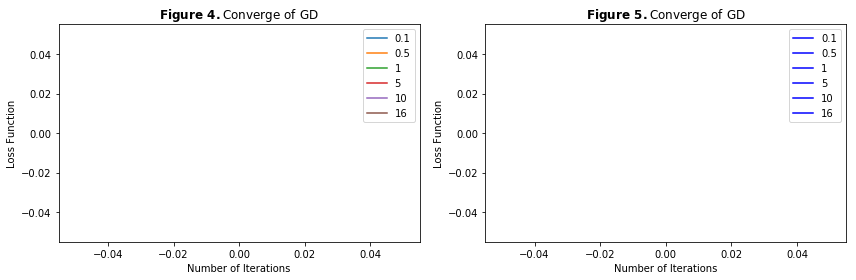

In [7]:
def visualize_error(X, y, step_sizes, best , num_iter = 1):
    plt.figure(figsize=(12, 4))
    
    fig, axes = plt.subplots(1, 2,figsize=(12, 4))
    for step in step_sizes:
        ### STUDENT TASK ###
        # Plot Error against Step Size
        # loss_list, w_opt = 
        # YOUR CODE HERE
        
        loss_list, w_opt=logisticRegression_func(X,y,step, num_iter)
        n = len(loss_list) # Size of list remains the same.
        print(loss_list)
        x_axes = np.linspace(0,n,n,endpoint=False)
        axes[0].plot(x_axes, loss_list, label=step)
    axes[0].set_xlabel('Number of Iterations')
    axes[0].set_ylabel('Loss Function')
    axes[0].legend()
    axes[0].set_title(r'$\bf{Figure\ 4.}$Converge of GD')
    
    for step in step_sizes:
        ### STUDENT TASK ###
        # Plot Error against Step Size.
        # Now mark the best converge in red. Use value from best as a correct step size.
        # loss_list, w_opt = 
        # YOUR CODE HERE
        loss_list, w_opt=logisticRegression_func(X,y,step, num_iter)
        n = len(loss_list) # Size of list remains the same.
        x_axes = np.linspace(0,n,n,endpoint=False)
        if step == best:
            axes[1].plot(x_axes, loss_list, label=step, color="red")
        else:
            axes[1].plot(x_axes, loss_list, label=step, color="blue")
    
    axes[1].set_xlabel('Number of Iterations')
    axes[1].set_ylabel('Loss Function')
    axes[1].legend()
    axes[1].set_title(r'$\bf{Figure\ 5.}$Converge of GD')
    plt.tight_layout()
    return best, axes

### STUDENT TASK ###
# Change best=None into step size from the list that provides the fastest converge. e.g best=1
res0_1, axes = visualize_error(X/255, y, best=None, step_sizes=[0.1,0.5,1,5,10,16])
# YOUR CODE HERE

In [104]:
def calculate_accuracy(y,y_hat):
    ### STUDENT TASK ###
    # YOUR CODE HERe
    z=0
    for i in range (len(y)):
        if y[i]==y_hat[i]:
            z+=1
    accuracy=(1/len(y))*z
    print(y_hat)
    return accuracy
print ('Accuracy of the result is: %f%%' % calculate_accuracy(y,y_hat))

[[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 0.]
 [ 0.]
 [ 0.]]
Accuracy of the result is: 0.000000%


## 4. Results

*Summarize the results of the experiments without discussing their implications.*

*- Include both performance measures (accuracy and LogLoss).*

*- How does it perform on kaggle compared to the train data.*

*- Include a confusion matrix.*



In [ ]:
#Confusion matrix ...

## 5. Discussion/Conclusions

*Interpret and explain your results *

*- Discuss the relevance of the performance measures (accuracy and LogLoss) for
imbalanced multiclass datasets. *

*- How the results relate to the literature. *

*- Suggestions for future research/improvement. *

*- Did the study answer your questions? *



## 6. References

*List of all the references cited in the document*

## Appendix
*Any additional material needed to complete the report can be included here. For example, if you want to keep  additional source code, additional images or plots, mathematical derivations, etc. The content should be relevant to the report and should help explain or visualize something mentioned earlier. **You can remove the whole Appendix section if there is no need for it.** *